In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
import matplotlib.pyplot as plt

In [116]:
N = 20 #total_samples
B = 5  #Number of bits used for presenting data

# Step 1: Generate N real numbers between 0 and 2π
x = np.linspace(0, 2 * np.pi, N)
numbers = x

# Step 2: Normalize the numbers to a range suitable for bit conversion
min_val = 0
max_val = 2 * np.pi
normalized_numbers = (numbers - min_val) / (max_val - min_val)

# Step 3: Convert the normalized numbers to integers
int_numbers = (normalized_numbers * (2**B - 1)).astype(int)  # Using B bits

# Step 4: Convert the integers to bit strings
bit_strings = [format(num, f'0{B}b') for num in int_numbers]  # 4-bit binary strings

# Print the first 10 bit strings as an example
print(bit_strings[:10])


['00000', '00001', '00011', '00100', '00110', '01000', '01001', '01011', '01101', '01110']


In [117]:
XX = []
for i in range(N):
    result_list = [int(digit) for digit in bit_strings[i]]
    XX.append(result_list)
print(XX) 


[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 1, 0, 0, 0], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 0, 1], [1, 1, 1, 1, 1]]


In [118]:
# Step 1: Generate N real numbers between 1+sin(0) and 1+sin(2π)
y = 1+np.sin(x)
numbers = y

# Step 2: Normalize the numbers to a range suitable for bit conversion
min_val = 0
max_val = 2 * np.pi
normalized_numbers = (numbers - min_val) / (max_val - min_val)

# Step 3: Convert the normalized numbers to integers
int_numbers_y = (normalized_numbers * (2**B - 1)).astype(int)  # Using B bits

#Step 4: Convert the integers to bit strings
bit_strings = [format(num, f'0{B}b') for num in int_numbers_y]  # 4-bit binary strings

#Print the first 10 bit strings as an example
print(bit_strings)


['00100', '00110', '00111', '01001', '01001', '01001', '01001', '01000', '00111', '00101', '00100', '00010', '00001', '00000', '00000', '00000', '00000', '00001', '00011', '00100']


In [119]:
YY=[]
for j in range(N):
    result_list = [int(digit) for digit in bit_strings[j]]
    YY.append(result_list)
print(YY)

[[0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 1, 1, 1], [0, 0, 1, 0, 1], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0]]


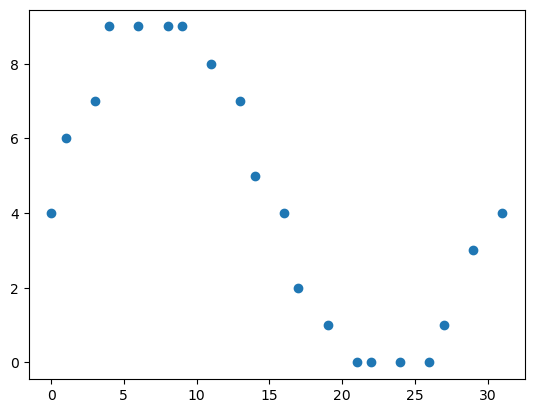

In [120]:
plt.scatter(int_numbers,int_numbers_y)
plt.show()

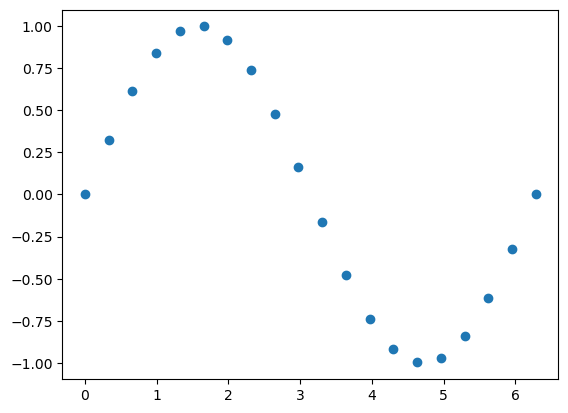

In [121]:
plt.scatter(x,y-1)
plt.show()

In [122]:
N1 = int(N-N/4)
N2 = int(N/4)
train_dataset1 = np.array(int_numbers[:N1])
train_label1 = np.array(int_numbers_y[:N1])
test_dataset1 = np.array(int_numbers[N1:N])
test_label1 = np.array(int_numbers_y[N1:N])

for x,y in zip(train_dataset1, train_label1):
    print(f"x = {x}, y = {y}")

x = 0, y = 4
x = 1, y = 6
x = 3, y = 7
x = 4, y = 9
x = 6, y = 9
x = 8, y = 9
x = 9, y = 9
x = 11, y = 8
x = 13, y = 7
x = 14, y = 5
x = 16, y = 4
x = 17, y = 2
x = 19, y = 1
x = 21, y = 0
x = 22, y = 0


In [123]:
N1 = int(N-N/4)
N2 = N-N1
train_dataset = np.array(XX[:N1])
train_label = np.array(YY[:N1])
test_dataset = np.array(XX[N1:N])
test_label = np.array(YY[N1:N])

for x,y in zip(train_dataset, train_label):
    print(f"x = {x}, y = {y}")

x = [0 0 0 0 0], y = [0 0 1 0 0]
x = [0 0 0 0 1], y = [0 0 1 1 0]
x = [0 0 0 1 1], y = [0 0 1 1 1]
x = [0 0 1 0 0], y = [0 1 0 0 1]
x = [0 0 1 1 0], y = [0 1 0 0 1]
x = [0 1 0 0 0], y = [0 1 0 0 1]
x = [0 1 0 0 1], y = [0 1 0 0 1]
x = [0 1 0 1 1], y = [0 1 0 0 0]
x = [0 1 1 0 1], y = [0 0 1 1 1]
x = [0 1 1 1 0], y = [0 0 1 0 1]
x = [1 0 0 0 0], y = [0 0 1 0 0]
x = [1 0 0 0 1], y = [0 0 0 1 0]
x = [1 0 0 1 1], y = [0 0 0 0 1]
x = [1 0 1 0 1], y = [0 0 0 0 0]
x = [1 0 1 1 0], y = [0 0 0 0 0]


In [124]:
wire_num = B
dev = qml.device("default.qubit",wires=wire_num)

In [125]:
def state_preparation(x):
    wi =  list(range(wire_num))
    qml.BasisState(x, wires=wi)

In [126]:
tuple1 = ()
for i in range(wire_num-1):
    list_b = [i,i+1] 
    tuple1 += (list_b,) 

In [127]:
def layer(layer_weights):
    for wire in range(wire_num):
        qml.Rot(*layer_weights[wire], wires=wire)
    for wires in tuple1:
        qml.CNOT(wires)
    qml.CNOT([wire_num-1,0])        


In [128]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)

    return [qml.expval(qml.PauliZ(i)) for i in range(wire_num)]

In [129]:
np.random.seed(0)
num_qubits = B
num_layers = 2
weights_init = np.pi * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)


print("Weights:", weights_init)
print("Bias: ", bias_init)

Weights: [[[ 5.54193389  1.25713095  3.07479606]
  [ 7.03997361  5.86710646 -3.07020901]
  [ 2.98479079 -0.47550269 -0.32427159]
  [ 1.28993324  0.45252622  4.56873497]
  [ 2.39087053  0.38225334  1.39443747]]

 [[ 1.04826882  4.69378784 -0.64452369]
  [ 0.98353119 -2.6832209  -8.02045405]
  [ 2.05340338  2.71570641 -2.33158018]
  [ 7.13064445 -4.56902452  0.14375462]
  [-0.58805541  4.81536792  4.61612672]]]
Bias:  0.0


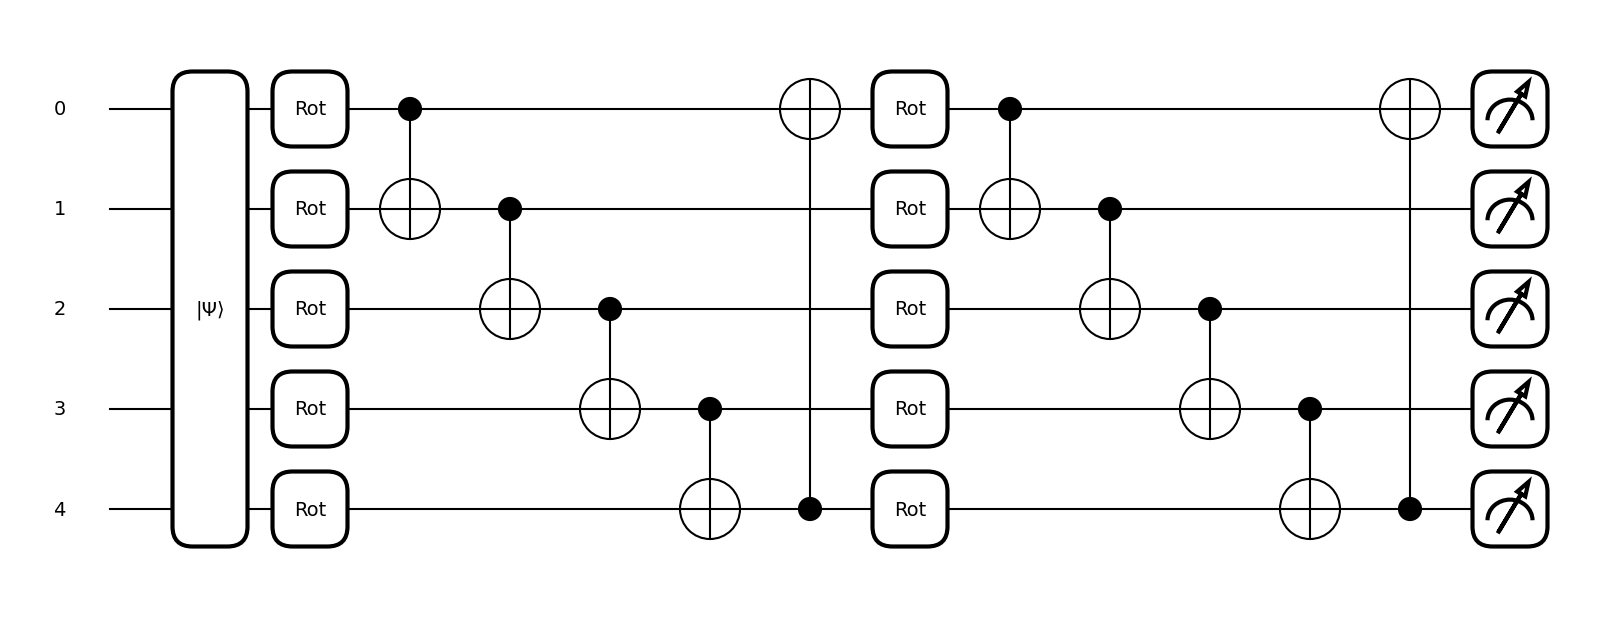

In [130]:
wei = np.array([0]*3*len(tuple1))
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(weights_init, XX)
plt.show()

In [131]:
def variational_functionestimation(weights, bias, x):
    return circuit(weights, x)+bias

In [132]:
X = train_dataset
a = variational_functionestimation(weights_init, bias_init, X[0])
b= [variational_functionestimation(weights_init, bias_init, x) for x in X]
print(b)
c = qml.math.stack(b)
print(c)

[tensor([ 0.1286835 ,  0.09943657, -0.11799   , -0.02711256, -0.376068  ], requires_grad=True), tensor([ 0.10545309,  0.01223249, -0.19498891,  0.0373615 , -0.09318114], requires_grad=True), tensor([-0.06071898,  0.09943657, -0.12671346, -0.04799087, -0.02941268], requires_grad=True), tensor([ 0.00189732, -0.09779858,  0.05281105,  0.01325457, -0.20761781], requires_grad=True), tensor([-0.0782928 , -0.01059451,  0.26889132,  0.03527853,  0.1881235 ], requires_grad=True), tensor([0.16996166, 0.01389947, 0.07395003, 0.04588555, 0.42823651], requires_grad=True), tensor([ 0.08720901,  0.07596656,  0.16612716, -0.0357061 ,  0.14119565], requires_grad=True), tensor([0.01043882, 0.01389947, 0.0628891 , 0.03885133, 0.06098809], requires_grad=True), tensor([ 0.05201775, -0.07760455, -0.23974488,  0.00982422, -0.07013862], requires_grad=True), tensor([-0.08686873, -0.07760455, -0.23374549, -0.0240889 , -0.20404506], requires_grad=True), tensor([-0.15293905, -0.09940457,  0.09680221,  0.03028625,

In [133]:
label = train_label 
d = np.sum((c-label)** 2)
print(label)
print()
print(d)

[[0 0 1 0 0]
 [0 0 1 1 0]
 [0 0 1 1 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 0 0 0]
 [0 0 1 1 1]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]

25.757481193628987


In [134]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

In [135]:
def cost(weights, bias, X, Y):
    predictions = [variational_functionestimation(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

In [136]:
def accuracy(labels, predictions):
    acc = sum(sum(abs(l - p)) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

In [137]:
bb = [np.sign(variational_functionestimation(weights_init, bias_init, x)) for x in X]
dd =  qml.math.stack(bb)
for j in range(len(dd)):
    for i in range(len(dd[j])):
        if dd[j][i]<0:
            dd[j][i]=0
            
dd 
acc = sum(abs(l - p) < 1e-5 for l, p in zip(label, dd))
acc
ar = [sum(abs(l - p)) < 1e-5 for l, p in zip(label, dd)]
np.array(accuracy(label, dd))

tensor(0., requires_grad=True)

In [138]:
cost(weights_init, bias_init, train_dataset, train_label)

tensor(0.34343308, requires_grad=True)

In [139]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 2

In [140]:
weights = weights_init
bias = bias_init
for it in range(3):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(train_dataset), (batch_size,))
    X_batch = train_dataset[batch_index]
    Y_batch = train_label[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)
    print(weights)

    # Compute accuracy
    bb = [np.sign(variational_functionestimation(weights_init, bias_init, x)) for x in X]
    dd =  qml.math.stack(bb)
    for j in range(len(dd)):
        for i in range(len(dd[j])):
            if dd[j][i]<0:
                dd[j][i]=0
    predictions = dd
    
    current_cost = cost(weights, bias, train_dataset, train_label)
    acc = accuracy(train_label, predictions)
    

    print(current_cost,acc)

Autograd ArrayBox with value [[[ 5.54193389  1.25713095  3.07479606]
  [ 7.03997361  5.86710646 -3.07020901]
  [ 2.98479079 -0.47550269 -0.32427159]
  [ 1.28993324  0.45252622  4.56873497]
  [ 2.39087053  0.38225334  1.39443747]]

 [[ 1.04826882  4.69378784 -0.64452369]
  [ 0.98353119 -2.6832209  -8.02045405]
  [ 2.05340338  2.71570641 -2.33158018]
  [ 7.13064445 -4.56902452  0.14375462]
  [-0.58805541  4.81536792  4.61612672]]]
Autograd ArrayBox with value Autograd ArrayBox with value 0.25702181206768987 0.0
Autograd ArrayBox with value [[[ 5.54193389  1.25713095  3.07479606]
  [ 7.03997361  5.86710646 -3.07020901]
  [ 2.98479079 -0.47550269 -0.32427159]
  [ 1.28993324  0.45252622  4.56873497]
  [ 2.39087053  0.38225334  1.39443747]]

 [[ 1.04826882  4.69378784 -0.64452369]
  [ 0.98353119 -2.6832209  -8.02045405]
  [ 2.05340338  2.71570641 -2.33158018]
  [ 7.13064445 -4.56902452  0.14375462]
  [-0.58805541  4.81536792  4.61612672]]]
Autograd ArrayBox with value Autograd ArrayBox with 

**Cost does not change**